<a href="https://colab.research.google.com/github/yuvvantalreja/CAPTCHA-Image-Recognition-using-CRNN-and-BiGRU/blob/main/CAPTCHA_Text_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
import requests
import zipfile
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
data_path = Path("data/")

# If image folder doesn't exist commence download
if data_path.is_dir():
  print(f"{data_path} directory already exists... skipping download")
else:
  print(f"Image path doesn't exist creating one...")
  data_path.mkdir(parents = True, exist_ok = True)

with open(data_path/"data.zip", "wb") as f:
  request = requests.get("https://github.com/yuvvantalreja/CAPTCHA-Image-Recognition-using-CRNN-and-BiGRU/raw/main/data.zip")
  print("Downloading data")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path/"data.zip", "r") as zip_ref:
  print("Unzipping data")
  zip_ref.extractall(data_path)

Image path doesn't exist creating one...
Unzipping data


In [5]:
import random
from PIL import Image

image_path_list = list(data_path.glob("*/*.png"))
image_path_list[0]

PosixPath('data/data/ng46m.png')

In [6]:
# Split into train and test data
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(image_path_list, test_size = 0.2, train_size = 0.8, random_state = 42)

len(train_set), len(test_set)

(832, 208)

Image Label: be6np


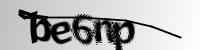

In [15]:
random.seed(42)
random_img = random.choice(image_path_list)
img = Image.open(random_img)
print(f"Image Label: {str(random_img.stem)}")
img

In [10]:
import os
import pathlib
import torch
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Creating custom dataset

class CaptchaDataset(Dataset):
  def __init__(self, data_dir, ):


In [ ]:
# Visualize 9 random samples from dataset

fig = plt.figure(figsize = (9, 9))
rows, cols = 9, 9

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(image_path_list), size = [1]).item()
  img = image_path_list[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img)
  plt.axis(False)